## SIRD Model
As mentioned before, the SIR model is good for basic simulations. But what if recovery is not the only outcome of an epidemic? Well, what if a patient can either recover or die? For that, we simply add a compartment to the SIR model, such that it branches out from the infective compartment, making the outcomes either **recovered** or **dead**. This entails the addition of another compartment, D or dead, in addition to the S, I and R compartments.<br>

The SIRD model is defined by the following system of ODEs:

\begin{equation}
        \frac{dS}{dt} =    \frac{-\beta S I}{N}
\end{equation}

\begin{equation}
        \frac{dI}{dt} =    \frac{-\beta S I}{N} - \gamma I
\end{equation}

\begin{equation}
        \frac{dR}{dt} =    \gamma (1 - \mu) I
\end{equation}

\begin{equation}
        \frac{dD}{dt} =    \gamma \mu I
\end{equation}<br>
The definitions of $\beta$ and $\gamma$ are the same as before.
$\mu$ is the mortality rate, or the fraction of cases that move to the death compartment. In the long run, the mortality rate is equal to the Case Fatality Ratio, which can be estimated from existing data on the epidemic. The case fatality ratio is the ratio of total deaths to number of cases identified. Since a person can be either recovered or dead, we assume the average likelihood of death to be the CFR (based on the data), and thus, subtract that likelihood from 1 to get the chance of survival (equivalent to recovery). 

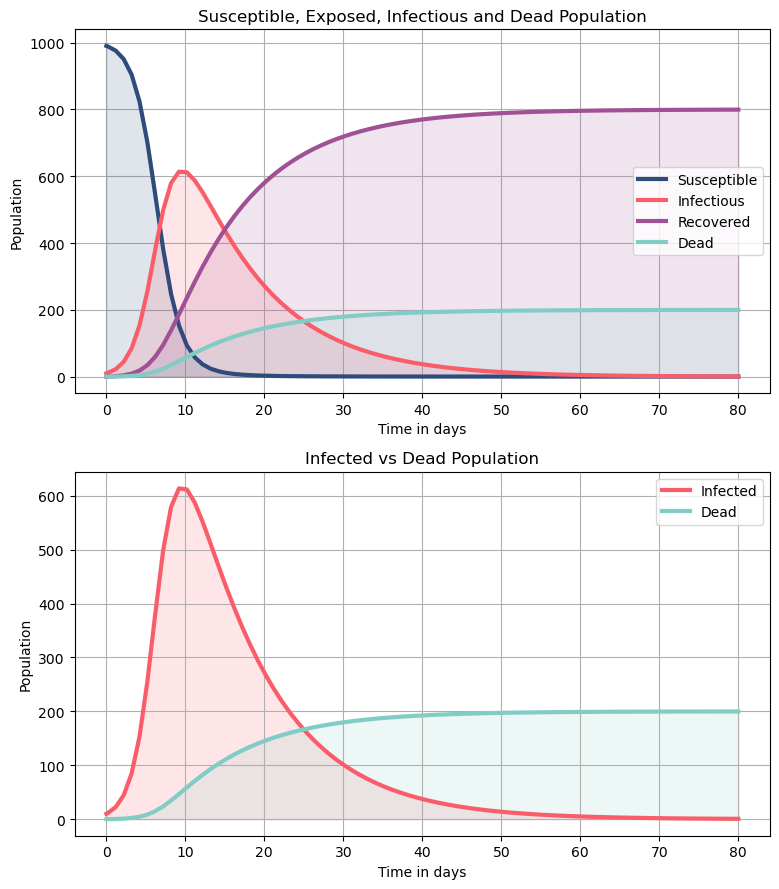

In [15]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
COLORS = {"S": "#2f4b7c",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#81cdc6"}

#parameter values
R0 = 8
t_infective = 10
gamma = 1/t_infective
beta = R0 * gamma
mu = 0.2 #CFR

# initial number of infected and recovered individuals
N=1000
I_initial = 0.01 * N
R_initial = 0
D_initial = 0
S_initial = N - I_initial - R_initial - D_initial

# SIRD model differential equations.
def SIRD(t, x, N, beta, gamma, mu):
    S, I, R, D = x
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt = gamma * (1 - mu) * I
    dDdt = gamma * mu * I
    return [dSdt, dIdt, dRdt, dDdt]

x_initial = S_initial, I_initial, R_initial, D_initial
soln = solve_ivp(fun=SIRD, t_span=(0, 80), y0=x_initial, args=(N, beta, gamma, mu), max_step=1) #solving
S, I, R, D = soln.y

#plotting the data
#def plotdata(t, S, I, R, D): 
fig = plt.figure(figsize=(15,9))
ax = [fig.add_subplot(221, axisbelow=True), fig.add_subplot(223)]

ax[0].plot(soln.t, S, color = COLORS['S'], lw=3, label='Susceptible')
ax[0].fill_between(soln.t, 0, S, color=COLORS["S"], alpha=0.15)
ax[0].plot(soln.t, I, color = COLORS['I'], lw=3, label='Infectious')
ax[0].fill_between(soln.t, 0, I, color=COLORS["I"], alpha=0.15)
ax[0].plot(soln.t, R, color = COLORS['R'], lw=3, label='Recovered')
ax[0].fill_between(soln.t, 0, R, color=COLORS["R"], alpha=0.15)
ax[0].plot(soln.t, D, color = COLORS['D'], lw=3, label='Dead')
ax[0].fill_between(soln.t, 0, D, color=COLORS["D"], alpha=0.15)
ax[0].set_title('Susceptible, Exposed, Infectious and Dead Population')
ax[0].set_xlabel('Time in days')
ax[0].set_ylabel('Population')

ax[1].plot(soln.t, I, color = COLORS['I'], lw=3, label='Infected')
ax[1].fill_between(soln.t, 0, I, color=COLORS["I"], alpha=0.15)
ax[1].plot(soln.t, D, color = COLORS['D'], lw=3, label='Dead')
ax[1].fill_between(soln.t, 0, D, color=COLORS["D"], alpha=0.15)
ax[1].set_title('Infected vs Dead Population')
ax[1].set_xlabel('Time in days')
ax[1].set_ylabel('Population')
    
for a in ax: 
    a.grid(True)
    a.legend()

plt.tight_layout()
plt.show()
